# Context

Sebuah perusahaan dalam sektor SaaS (Software as a Service) yang menjual software sales and marketing ke perusahaan lain ingin meningkatkan keuntungan.

**Masalah**

Banyak pesanan yang diterima perusahaan tidak beruntung dan bahkan rugi. Perusahaan tidak mengetahui perbedaan karakteristik order yang rugi dan order yang beruntung, serta daerah apa yang paling tepat untuk memperluas bisnis.

**Tujuan**

Jadi, tujuan projek ini adalah untuk menunjukkan apa yang membedakan order yang beruntung dan order yang tidak beruntung dan mencari perbedaan antara produk-produk dan negara.

# Data

Data ini merupakan data transaksi dan setiap baris mewakili sebuah order/transaksi. Ada 19 kolom di dalam data ini, yaitu:

1. Row ID: ID unik untuk setiap transaksi
2. Order ID: ID unik untuk setiap order
3. Order Date: Tanggal saat pesan
4. Date Key: Tanggal saat pesan dalam bentuk numerik.
5. Contact Name: Nama pemesan.
6. Country: Negara tempat pesanan dilakukan.
7. City: Kota tempat pesanan dilakukan.
8. Region: Wilayah tempat pesanan dilakukan.
9. Subregion: Subwilayah tempat pesanan dilakukan.
10. Customer: Nama perusahaan yang memesan.
11. Customer ID: ID unik untuk setiap pelanggan.
12. Industry: Industri pelanggan.
13. Segment: Segmen pelanggan (SMB, Strategic, Enterprise, etc.).
14. Product: Produk yang dipesan.
15. License: Kunci lisensi untuk produk.
16. Sales: Jumlah total penjualan transaksi.
17. Quantity: Jumlah total benda dalam transaksi.
18. Discount: Diskon yang diterapkan ke transaksi.
19. Profit: Keuntungan dari transaksi.

In [1]:
#Import modul yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msn
import os
import scipy.stats as scs
import warnings

#Matikan segala peringatan
warnings.filterwarnings("ignore")

Berikut 5 baris teratas dan terbawah dari dataset.


In [2]:
df = pd.read_csv(r'C:\Users\Elroy\Documents\pyth\SaaS\data\raw\SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# Data Understanding and Cleaning

Sebelum mulai analisa, data akan dibersihkan untuk anomali dan error serta bentuk data.

In [3]:
print(f'Baris dan kolom data: {df.shape}')
df.info()

Baris dan kolom data: (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64


In [4]:
pd.set_option('display.max_colwidth', None)
listItems = []
for col in df.columns :
    listItems.append( [col, df[col].nunique(), df[col].unique()])

uniqueTable = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItems)
uniqueTable

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Kita mendapat bahwa:
* dataset SaaS-Sales memiliki 19 kolom dan 9994 baris
* kolom `License` berisikan kunci lisensi unik untuk pelanggan, sehingga tidak dibutuhkan untuk analisa
* kolom `Order Date` hanya berisi tanggal pesan dalam bentuk teks, dan tidak dibutuhkan untuk analisa
* kolom `Date Key` memiliki data tipe integer, tetapi seharusnya memiliki tipe datetime. 

## Missing Value and Duplicates

In [5]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


<Axes: >

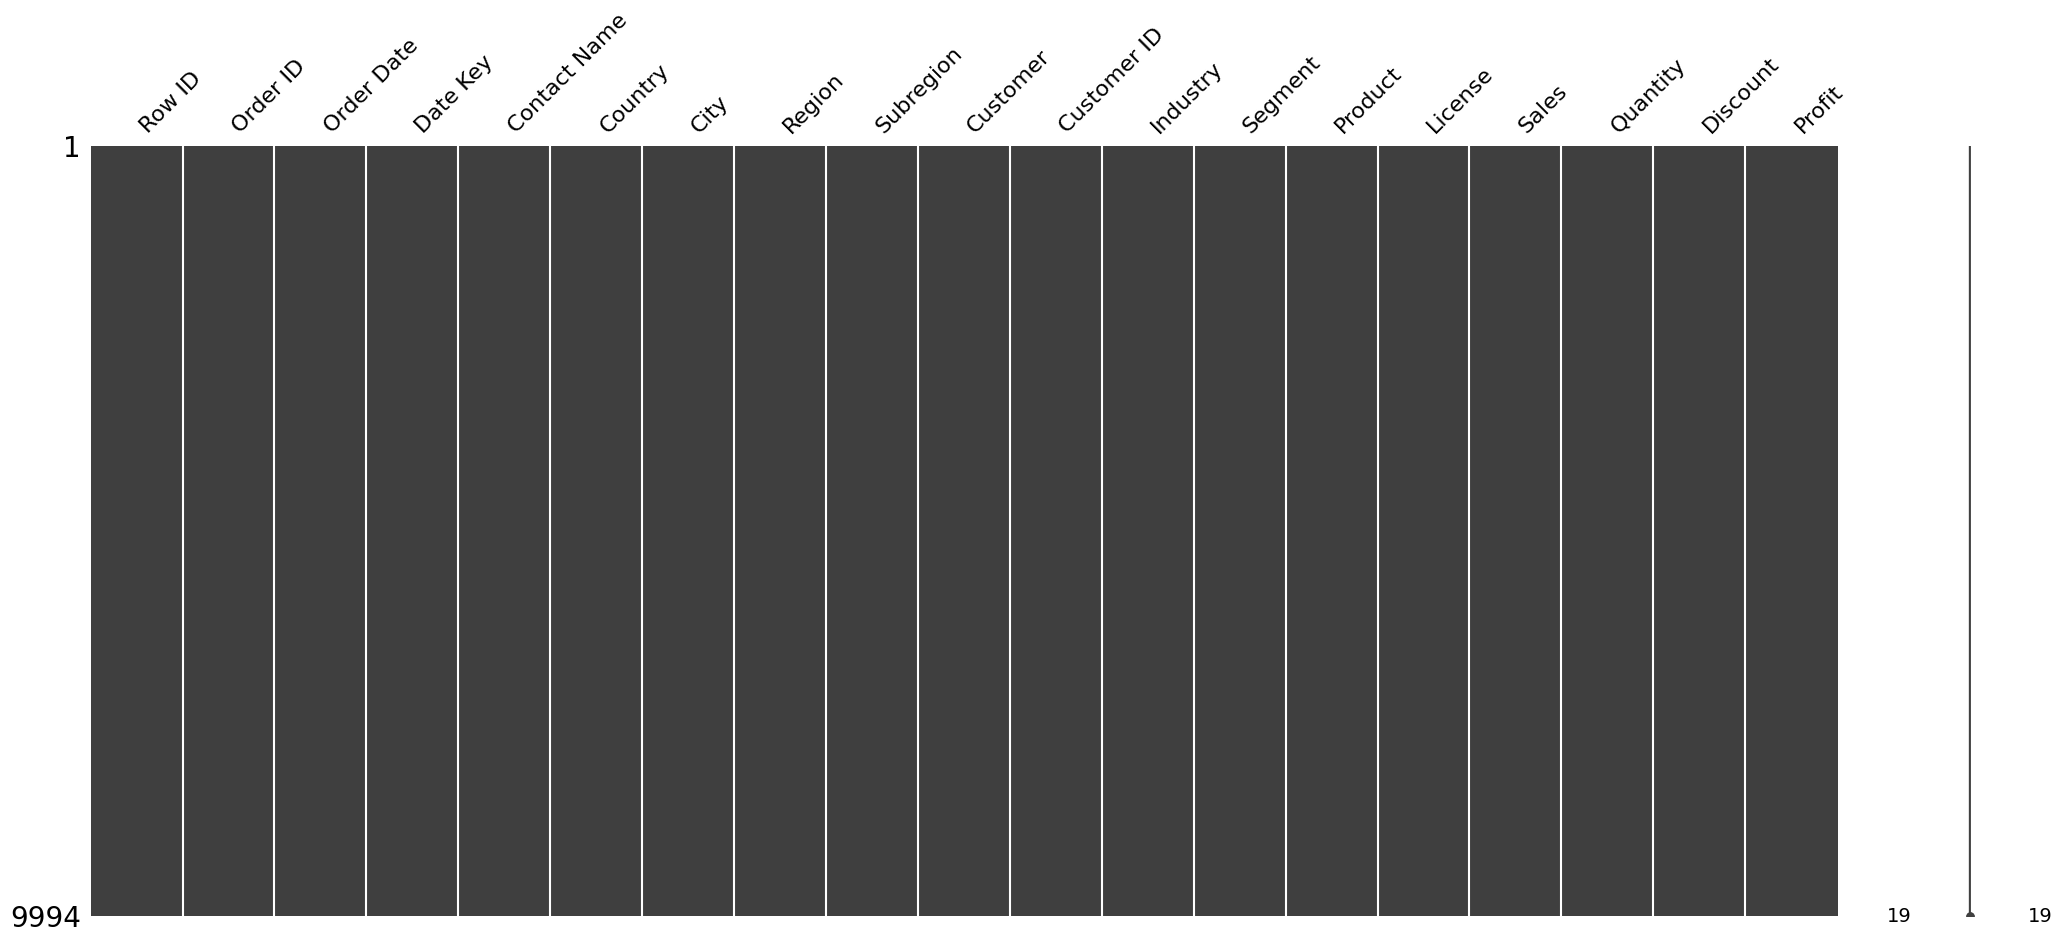

In [6]:
msn.matrix(df)

Data sudah bersih dan tidak memiliki missing value atau duplikat.

In [7]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


In [8]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


In [9]:
df.groupby('Subregion')['Row ID'].count().reset_index()

,Subregion,Row ID
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


Dapat dilihat bahwa data memiliki klasifikasi subregion yang aneh, seperti Italia sebagai satu-satu negara di dalam subregion 'EU' dan Israel di dalam subregion 'EU-EAST'. 

Solusi yang terbaik adalah untuk mengubah subregion negara-negara yang tidak masuk akal, tetapi karena kekurangan konteks klasifikasi subregion, lebih baik menghindari menggunakkan subregion dalam analisa dan hanya menggunakan region atau negara langsung dalam analisa.

# Data Analysis

Pertama, mengganti format kolom `Date Key` ke datetime

In [10]:
df['Date Key'] = pd.to_datetime(df['Date Key'], format='%Y%m%d')

Lalu, kolom `Order Date` dan `License` dapat di drop dari dataframe.

In [11]:
df = df.drop(columns=['Order Date', 'License'])

In [12]:
# Menggunakkan path absolute karena hanya cara ini berfungsi untuk laptop saya
saas_directory = "C:/Users/Elroy/Documents/pyth/SaaS"

export_folder = "data/cleaned"

os.makedirs(os.path.join(saas_directory, export_folder), exist_ok=True)

output_csv = os.path.join(saas_directory, export_folder, "cleaned_data.csv")

df.to_csv(output_csv, index=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Date Key      9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Dataset sudah disiapkan dan dapat mulai dianalisa serta tersimpan.

## Berdasarkan kolom numerik

Analisa berdasarkan kolom numerik bertujuan untuk menjawab beberapa pertanyaan:

* Faktor apa saja dalam data yang memiliki relasi dengan keuntungan transaksi?
* Apakah ada perbedaan statistika dalam faktor tersebut antara transaksi yang beruntung dan transaksi yang rugi?

Pertama, membagi data menjadi tiga berdasarkan profitabilitas transaksi untuk analisa mendalam.

In [46]:
def bin_profit(profit):
    if profit > 0:
        return 'Profit'
    elif profit < 0:
        return 'Loss'
    else:
        return 'Even'
df['Profit Category'] = df['Profit'].apply(bin_profit)

even_df = df[df['Profit Category']=='Even']
profit_df = df[df['Profit Category']=='Profit']
loss_df = df[df['Profit Category']=='Loss']

num_even_data = len(even_df)
num_profit_data = len(profit_df)
num_loss_data = len(loss_df)

print(f'Jumlah transaksi yang di titik impas: {num_even_data}')
print(f'Jumlah transaksi yang beruntung: {num_profit_data}')
print(f'Jumlah transaksi rugi: {num_loss_data}')

Jumlah transaksi yang di titik impas: 65
Jumlah transaksi yang beruntung: 8058
Jumlah transaksi rugi: 1871


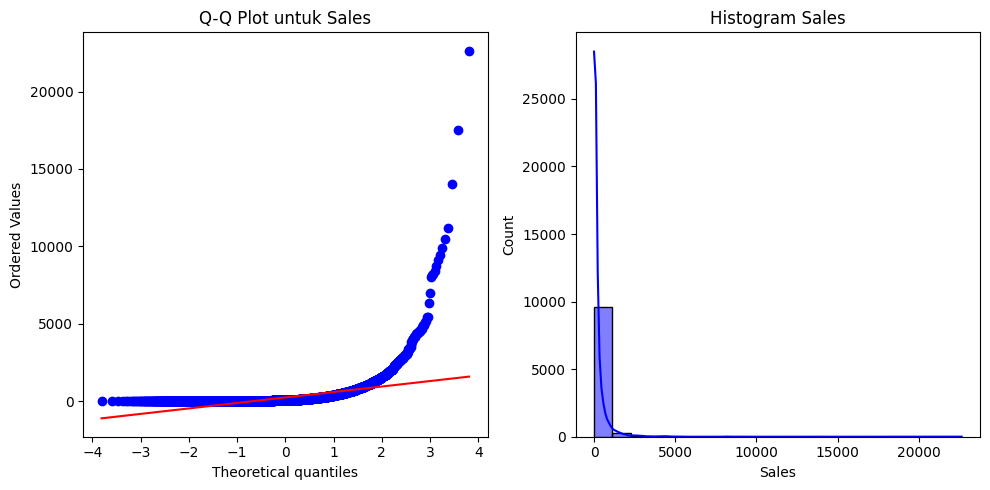

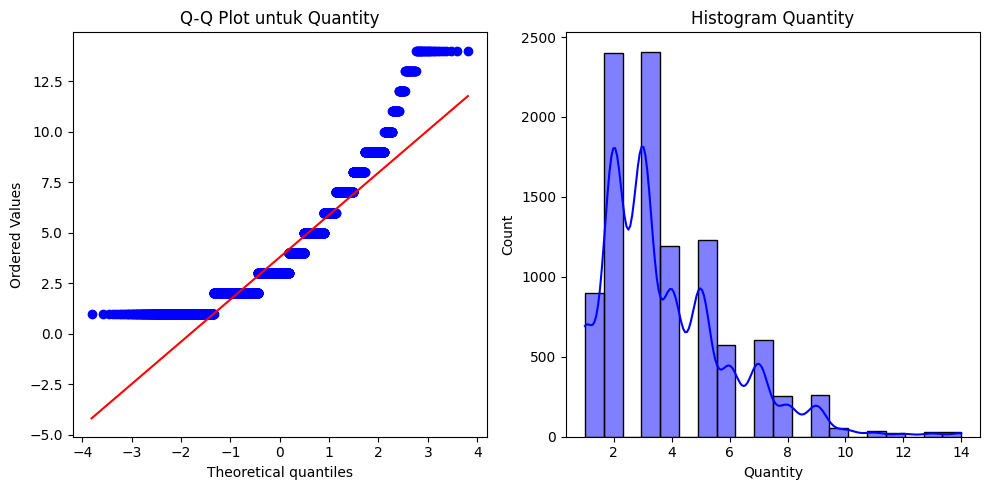

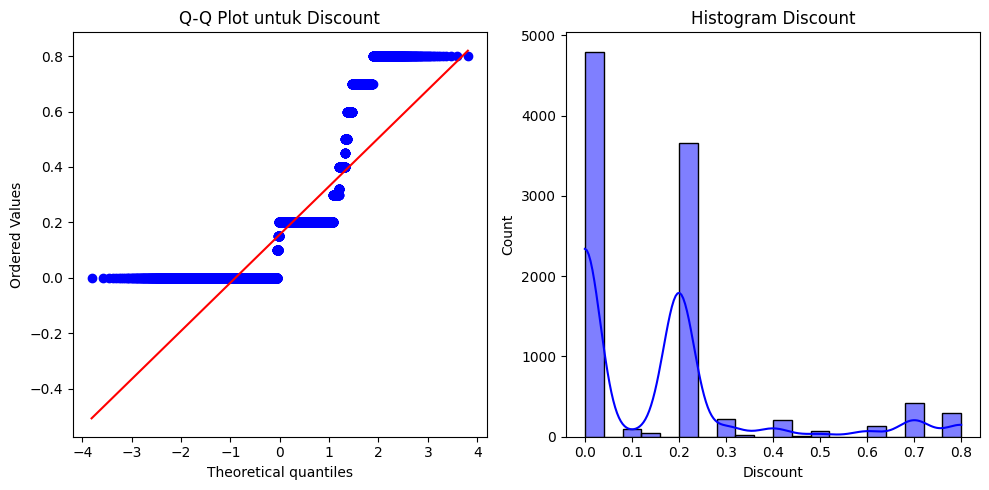

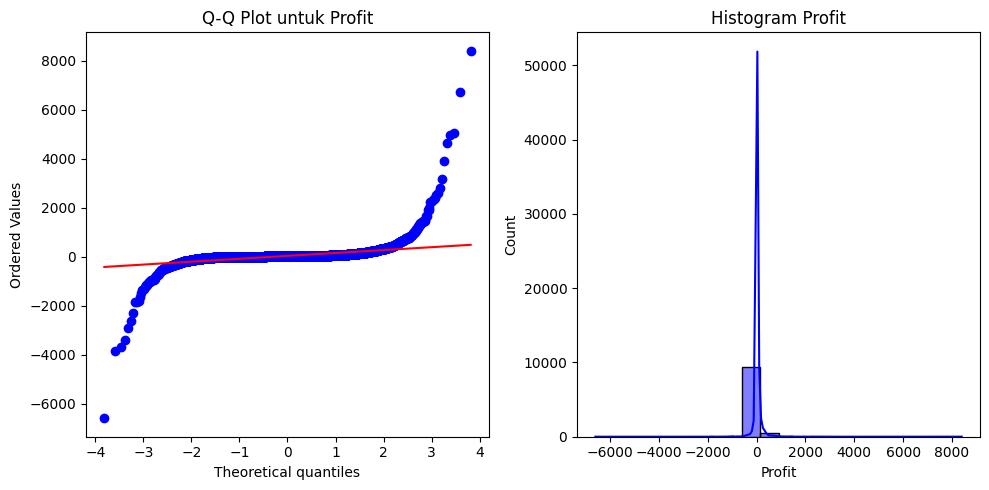

In [15]:
from scipy.stats import probplot

numeric_columns = df[['Sales', 'Quantity', 'Discount', 'Profit']]

def plot_qq_with_histogram(data):
    for col in data.columns:
        plt.figure(figsize=(10, 5))
        

        plt.subplot(1, 2, 1)
        probplot(data[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot untuk {col}")
        
        plt.subplot(1, 2, 2)
        sns.histplot(data=data[col], bins=20, kde=True, color='b')
        plt.title(f"Histogram {col}")
        
        plt.tight_layout()
        plt.show()

plot_qq_with_histogram(numeric_columns)

Dari grafik-grafik di atas, dapat dilihat bahwa semua data numerik tidak mengikuti distribusi normal dan memiliki banyak outlier, sehingga segala tes statistika sebaiknya yang non-parametrik atau menggunakkan grafik. 

Selanjutnya, dapat mencari perbedaan antara pesan beruntung dan rugi dengan metrik statistika dasar seperti median.

In [16]:
profit_df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,8058.000000,8058,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000
mean,4967.272648,2022-05-02 01:06:07.237528064,1049.651526,223.480623,3.794738,0.081044,54.917884
min,1.000000,2020-01-04 00:00:00,1001.000000,0.990000,1.000000,0.000000,0.062800
25%,2483.250000,2021-05-26 00:00:00,1024.000000,17.940000,2.000000,0.000000,5.324550
50%,4965.000000,2022-06-29 00:00:00,1049.000000,50.965000,3.000000,0.000000,13.317600
75%,7427.250000,2023-05-16 00:00:00,1076.000000,191.976000,5.000000,0.200000,40.465550
max,9994.000000,2023-12-31 00:00:00,1101.000000,17499.950000,14.000000,0.400000,8399.976000
std,2872.723630,NaN,29.635240,600.340641,2.244696,0.098884,213.713980


In [17]:
loss_df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,1871.000000,1871,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,5123.965794,2022-04-28 03:02:24.307856896,1050.128808,250.511574,3.762694,0.480887,-83.448042
min,4.000000,2020-01-05 00:00:00,1001.000000,0.444000,1.000000,0.100000,-6599.978000
25%,2599.000000,2021-05-10 00:00:00,1023.000000,12.503000,2.000000,0.200000,-58.660950
50%,5098.000000,2022-06-13 00:00:00,1050.000000,71.088000,3.000000,0.400000,-18.088200
75%,7788.000000,2023-05-06 12:00:00,1076.000000,284.922000,5.000000,0.700000,-6.261500
max,9963.000000,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,-0.089500
std,2929.381441,NaN,30.095249,715.067296,2.141347,0.235080,284.423422


Melalui tabel diatas, kita menemui bahwa rata-rata `Discount` transaksi yang rugi jauh lebih tinggi dari yang untung atau titik impas.  Ada juga perbedaan rata-rata jumlah `Sales` antara pesan beruntung dan rugi.

Selain itu, tidak ada perbedaan data yang menonjol. Untuk mengkonfirmasi penemuan diskon, tes korelasi menggunakkan spearman akan dilakukan untuk menemui faktor-faktor yang mempengaruhi keuntungan dari suatu pesan.

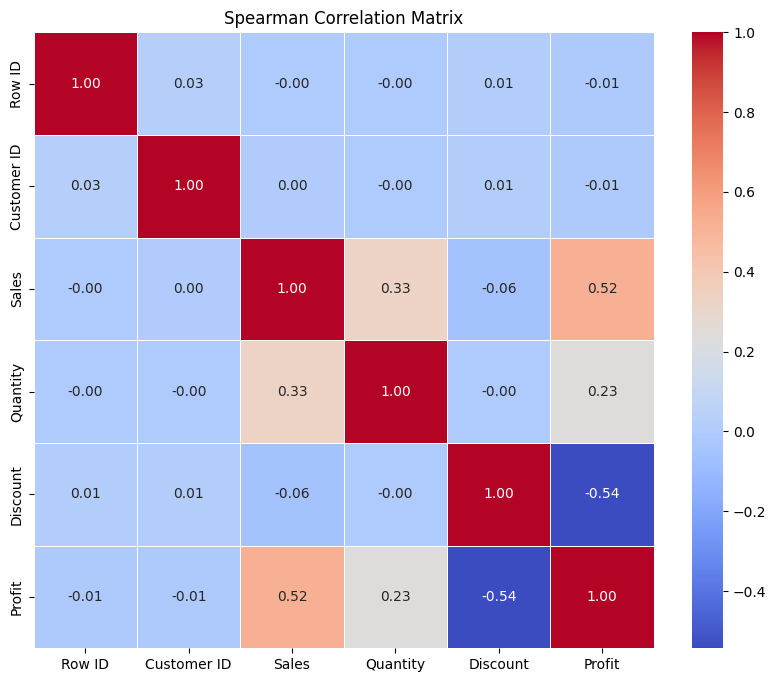

In [18]:
numerical_columns = df.select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

Dari grafik di atas, kita mengkonfirmasi :
* Hubungan negatif kuat antara `Profit` dan `Discount`
* Hubungan positif kuat antara `Profit` dan `Sales`

Juga ditemukan hubungan lain yang tidak jelas melalui statistika sebelumnya, yaitu : 
* Hubungan positif lemah antara `Profit` dan `Quantity`
* Hubungan positif lemah antara `Sales` dan `Quantity`, tetapi ini tidak penting untuk analisa ini.

Dengan informasi tersebut, kita dapat membandingkan faktor tersebut antara transaksi beruntung dan transaksi rugi.

Mann-Whitney U test untuk Sales
H0 tidak ditolak, sama.
Mann-Whitney U statistic: 7435605.0
P-value: 0.3580691781804086


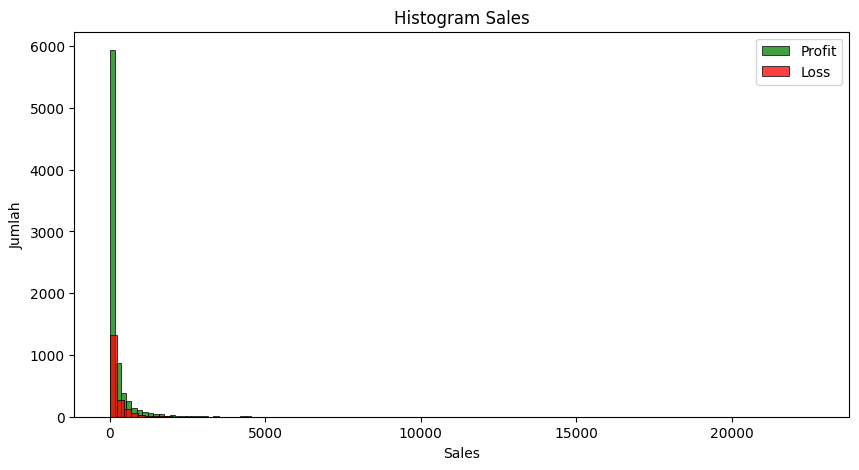

Mann-Whitney U test untuk Quantity
H0 tidak ditolak, sama.
Mann-Whitney U statistic: 7527868.5
P-value: 0.9246504059288024


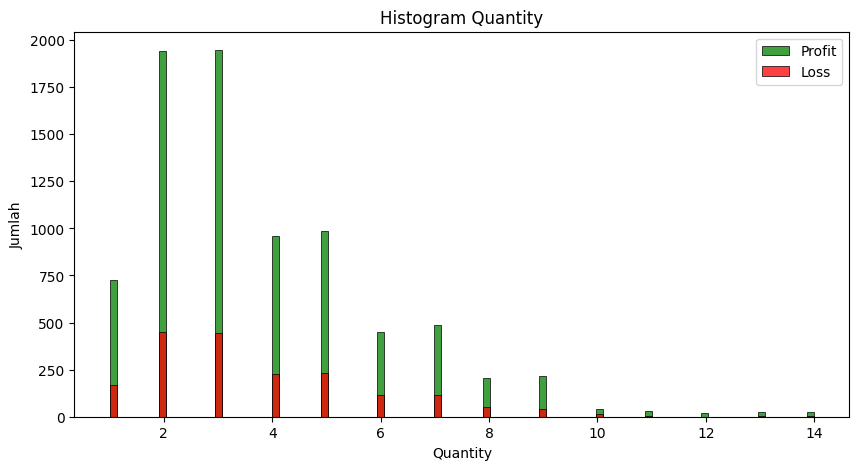

Mann-Whitney U test untuk Discount
Tolak H0, beda.
Mann-Whitney U statistic: 878603.5
P-value: 0.0


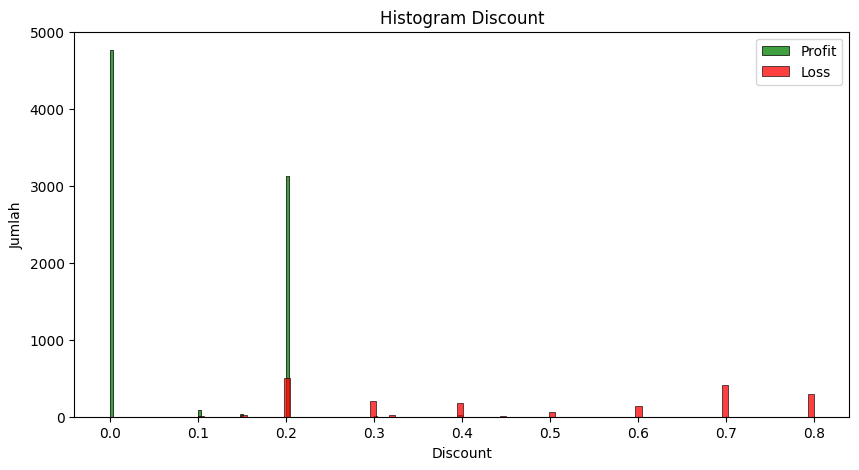

In [19]:
numerical_columns = ['Sales', 'Quantity', 'Discount']

for col in numerical_columns:

    statistic, p_value = scs.mannwhitneyu(profit_df[col], loss_df[col], alternative='two-sided')
    
    print(f"Mann-Whitney U test untuk {col}")
    if p_value < 0.05:
        print("Tolak H0, beda.")
    else:
        print("H0 tidak ditolak, sama.")
    print("Mann-Whitney U statistic:", statistic)
    print("P-value:", p_value)

    plt.figure(figsize=(10, 5))
    sns.histplot(data=profit_df, x=col, bins=100, color='g', label='Profit')
    sns.histplot(data=loss_df, x=col, bins=100, color='r', label='Loss')
    
    plt.title(f"Histogram {col}")
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend()
    
    plt.show()
    

Tes Mann-Whitney U dan grafik menunjukkan bahwa hanya `Discount` yang berbeda antara transaksi rugi dan beruntung, dengan jauh lebih banyak transaksi rugi daripada transaksi beruntung dengan `Discount` di atas 0.2. 

Jadi, dapat menjawab pertanyaan :

* Faktor apa saja dalam data yang memiliki relasi dengan keuntungan transaksi?

`Discount`,`Sales`, dan `Quantity`.
* Apakah ada perbedaan statistika dalam faktor tersebut antara transaksi yang beruntung dan transaksi yang rugi?

Ada, dengan mayoritas `Discount` diatas 0.2 termasuk transaksi rugi.


## Berdasarkan Negara dan Daerah

Selanjutnya, akan menganalisa data berdasarkan data geografis yang dimiliki. Tujuan ini untuk menjawab beberapa pertanyaan:

* Apakah ada negara yang harus menjadi prioritas bisnis untuk ekspansi?
* Apakah ada negara yang harus dihindari untuk menghindari rugi?

Pertama akan memulai analisa dengan melihat berdasarkan daerah.

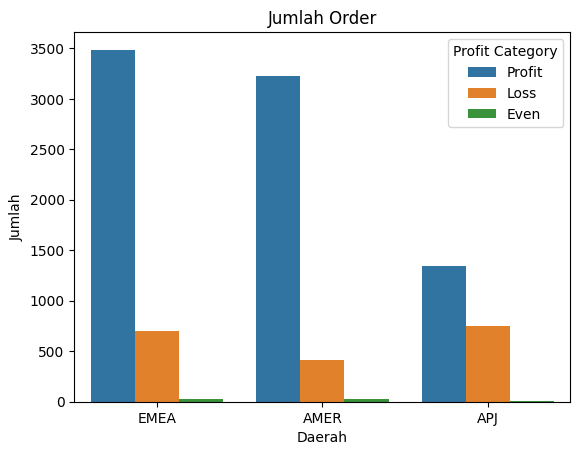

In [20]:
hue_order = ['Profit','Loss','Even']

sns.countplot(x='Region',data=df,hue='Profit Category', hue_order=hue_order,)

plt.title("Jumlah Order")
plt.xlabel("Daerah")
plt.ylabel("Jumlah")

plt.show()

Dari grafik di atas, kita menemukan bahwa daerah APJ memiliki jumlah order paling terkecil, dibandingkan AMER dan EMEA. 

Daerah EMEA memiliki rasio transaksi beruntung dan rugi lebih buruk daripada daerah AMER, tapi beberapa negara bisa merupakan sebab perbedaan tersebut.
Kita dapat melakukan analisa mendalam mencari negara-negara apa yang harus dihindari mulai dari APJ, yang memiliki jumlah transaksi rugi terbanyak walaupun memiliki total transaksi terkecil.

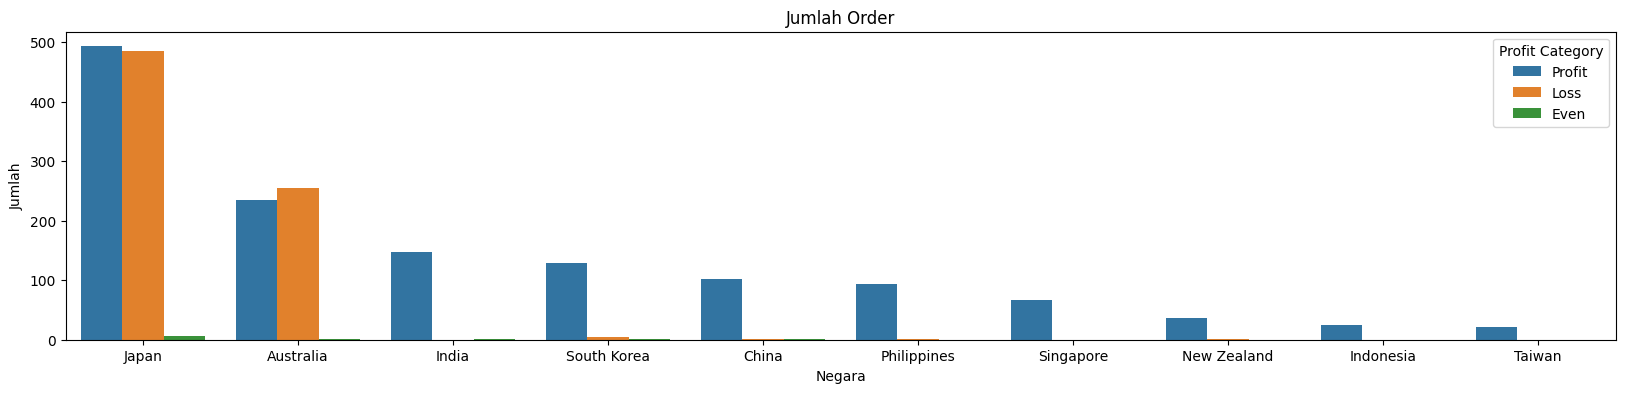

In [21]:
hue_order = ['Profit','Loss','Even']
plt.figure(figsize=(20, 4))

order = df[df['Region'] == 'APJ']['Country'].value_counts().nlargest(14).index

sns.countplot(x='Country',data=df[df['Region']=='APJ'],hue='Profit Category', hue_order=hue_order, order=order)

plt.title("Jumlah Order")
plt.xlabel("Negara")
plt.ylabel("Jumlah")

plt.show()

Dari grafik diatas, terlihat bahwa negara-negara yang lebih kaya seperti Australia dan Jepang memiliki transaksi rugi banyak, sedangkan negara lebih miskin seperti India dan Filipina lebih aman untuk keuntungan. 

Kita dapat mengkonfirmasi apakah pola ini konsistent di seluruh dunia atau hanya di daerah APJ dengan membuat grafik yang sama untuk daerah lain.

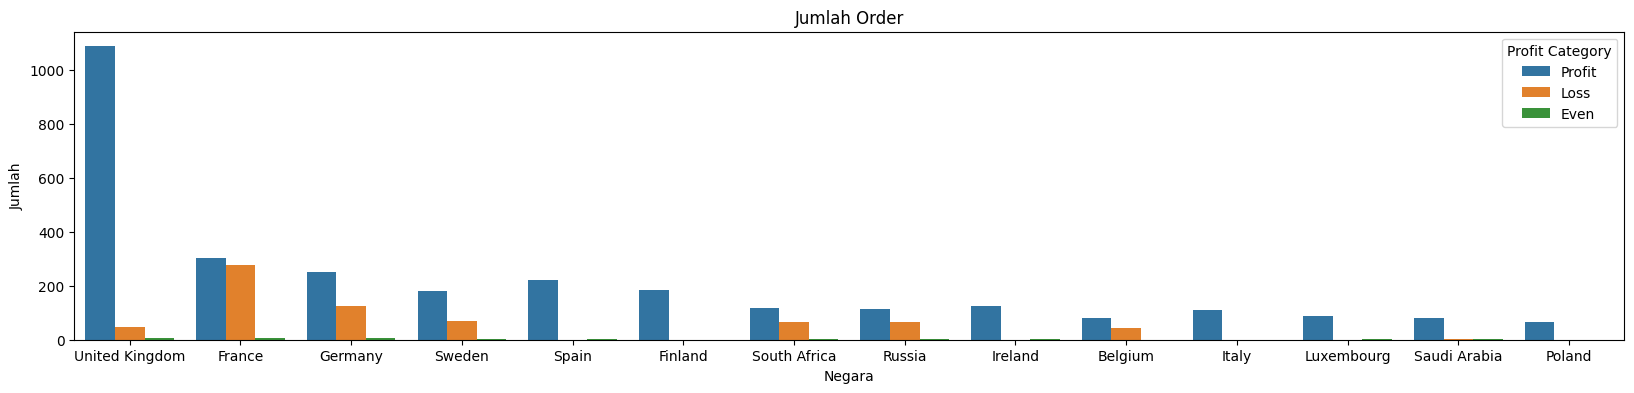

In [22]:
hue_order = ['Profit','Loss','Even']
plt.figure(figsize=(20, 4))

order = df[df['Region'] == 'EMEA']['Country'].value_counts().nlargest(14).index

sns.countplot(x='Country',data=df[df['Region']=='EMEA'],hue='Profit Category', hue_order=hue_order, order=order)

plt.title("Jumlah Order")
plt.xlabel("Negara")
plt.ylabel("Jumlah")

plt.show()

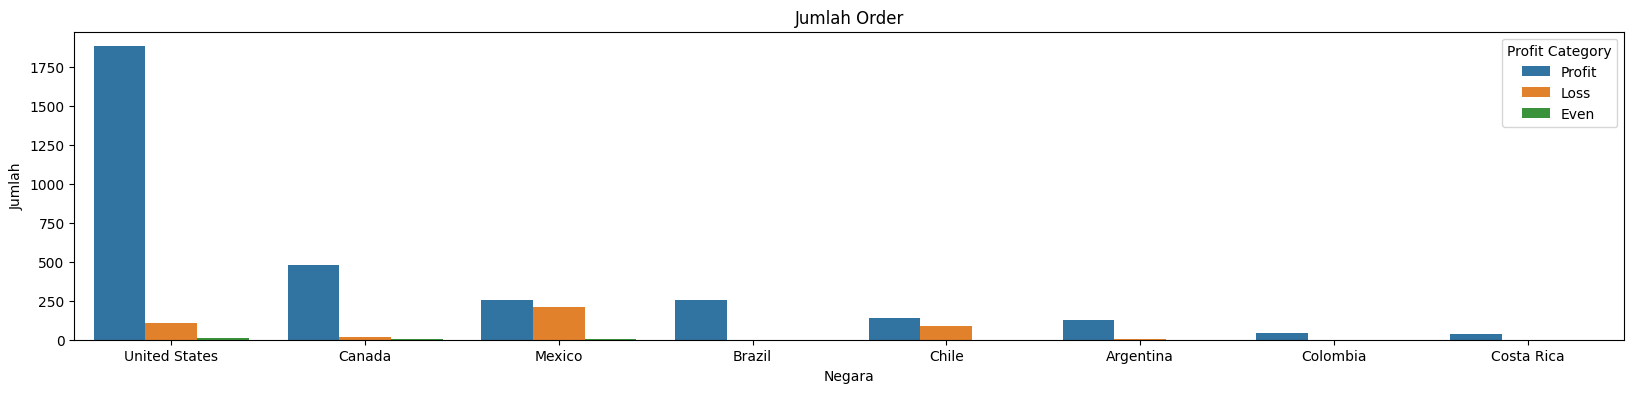

In [23]:
hue_order = ['Profit','Loss','Even']
plt.figure(figsize=(20, 4))

order = df[df['Region'] == 'AMER']['Country'].value_counts().nlargest(14).index

sns.countplot(x='Country',data=df[df['Region']=='AMER'],hue='Profit Category', hue_order=hue_order, order=order)

plt.title("Jumlah Order")
plt.xlabel("Negara")
plt.ylabel("Jumlah")

plt.show()

Dari 2 chart tersebut, kita menemukan bahwa pola tersebut tidak konsistent di seluruh dunia. Tetapi, bisa saja ada eksplanasi untuk pola tersebut dalam data lain.

Jadi, untuk menjawab pertanyaan dari atas :

* Apakah ada negara yang harus menjadi prioritas bisnis untuk ekspansi?

Ada, seperti India, Filipina, Spanyol dan Finlandia. 
* Apakah ada negara yang harus dihindari untuk menghindari rugi?

Ada, seperti Jepang, Australia, Perancis dan Mexico.


## Berdasarkan Segmen

Dalam data ini ada tiga jenis segmen, yaitu SMB, Strategic dan Enterprise. Kita dapat menganalisa data berdasarkan tiga jenis tersebut dan mencari jika ada perbedaan dalam profitabilitas yang disebab oleh segmen.

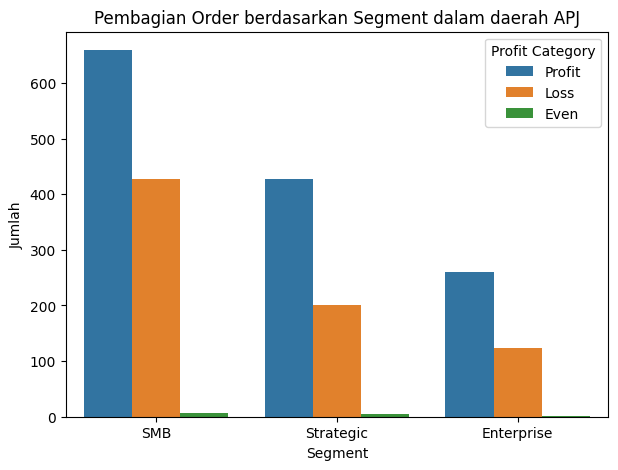

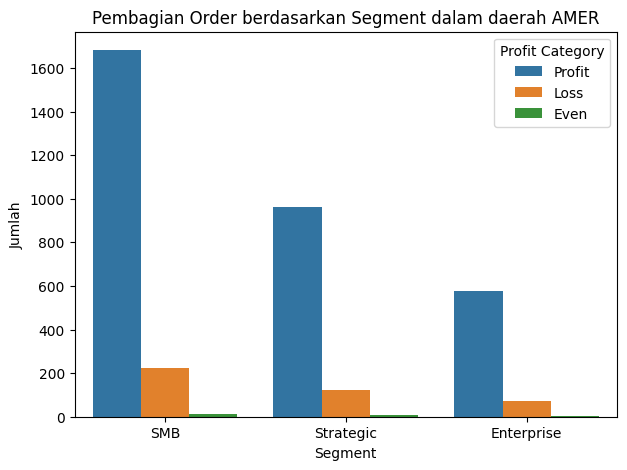

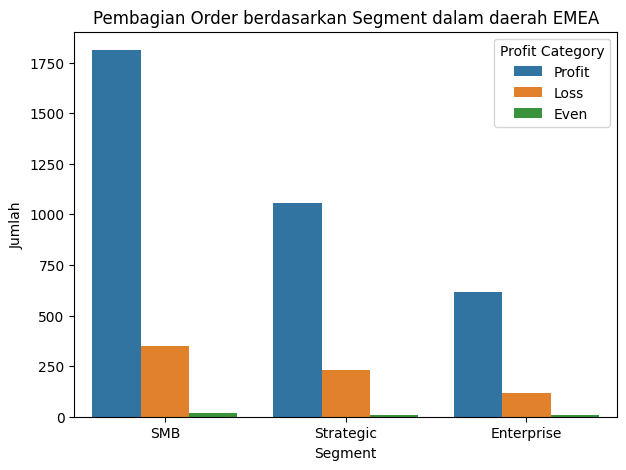

In [24]:
regions = ['APJ', 'AMER', 'EMEA']
for region in regions:
    hue_order = ['Profit','Loss','Even']
    plt.figure(figsize=(7, 5))

    sns.countplot(x='Segment',data=df[df['Region']==region],hue='Profit Category', hue_order=hue_order, order=['SMB','Strategic','Enterprise'])

    plt.title(f"Pembagian Order berdasarkan Segment dalam daerah {region}")
    plt.xlabel("Segment")
    plt.ylabel("Jumlah")

    plt.show()

Dari 3 grafik di atas, tidak ada banyak perbedaan dalam distribusi order beruntung dan rugi, sehingga dapat disimpulkan bahwa `Segment` tidak berpengaruh terhadap profitabilitas transaksi.

## Berdasarkan Industri

Sekarang, kita akan beranalisa berdasarkan sektor industri pelanggan.

Ada beberapa pertanyaan yang merupakan tujuan analisa ini untuk menjawab yaitu:

* Apakah ada industri spesifik yang lebih beruntung?
* Apakah ada perbedaan keuntungan transaksi dalam beda-beda industri?


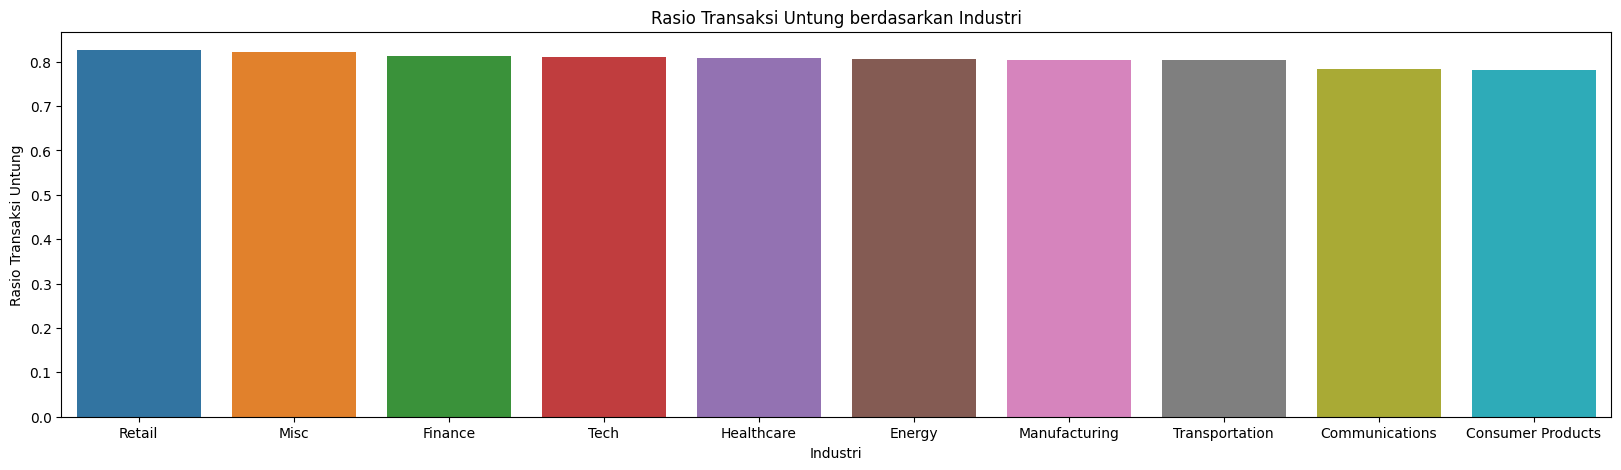

In [25]:
industry_counts = df.groupby('Industry')['Profit Category'].value_counts(normalize=True).unstack().fillna(0)

industry_counts = industry_counts.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=industry_counts, x=industry_counts.index, y='Profit', ci=None)
plt.title("Rasio Transaksi Untung berdasarkan Industri")
plt.xlabel("Industri")
plt.ylabel("Rasio Transaksi Untung")
plt.show()

Dari grafik di atas, kita bisa menjawab pertanyaan tersebut:

* Apakah ada industri spesifik yang lebih beruntung?

Tidak.
* Apakah ada perbedaan keuntungan transaksi dalam beda-beda industri?

Tidak ada perbedaan keuntungan transaksi antara industri.

## Berdasarkan Produk

Ada 14 aneka produk yang ditawarkan perusahaan ke pelanggan, dapat dianalisa berdasarkan produk-produk apakah ada perbedaan keuntungan. 

Berikut adalah beberapa pertanyaan yang memberi direksi untuk analisa ini:

* Apakah produk memiliki efek terhadap keuntungan sebuah transaksi?
* Apakah ada produk yang lebih untung daripada yang lain serta produk yang lebih rugi?
* Apakah produk versi "Gold" lebih beruntung?


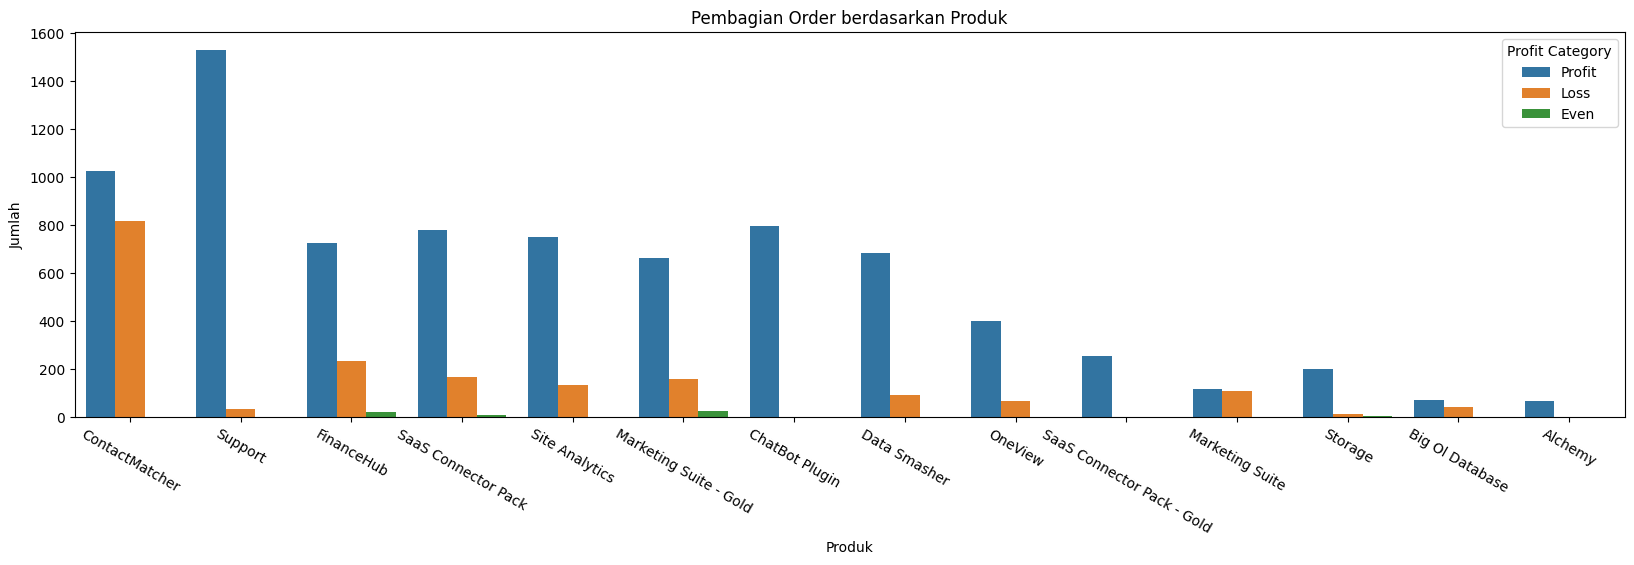

In [26]:
hue_order = ['Profit', 'Loss', 'Even']

order = df.groupby('Product')['Profit Category'].value_counts().unstack().fillna(0).sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(20, 5))

sns.countplot(x='Product', data=df, hue='Profit Category', hue_order=hue_order, order=order)

plt.title("Pembagian Order berdasarkan Produk")
plt.xlabel("Produk")
plt.ylabel("Jumlah")

plt.xticks(rotation=-30)

plt.show()

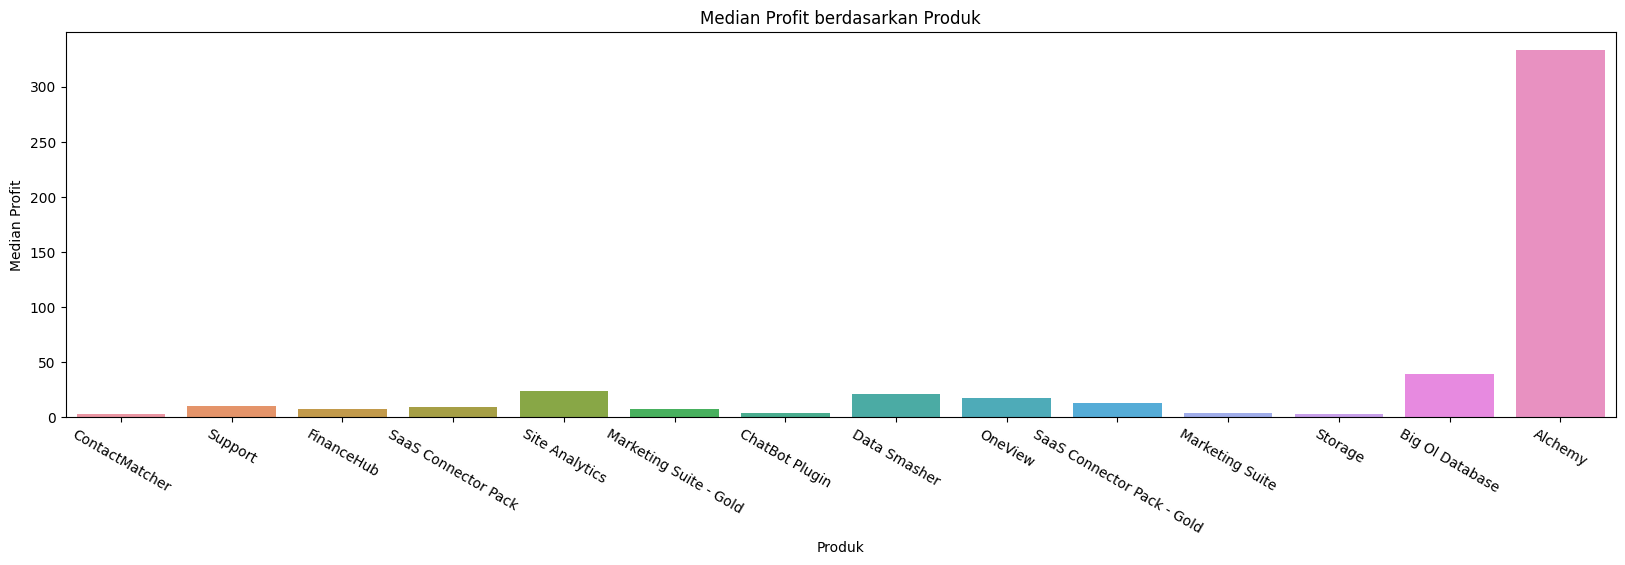

In [27]:
plt.figure(figsize=(20, 5))

# Calculate the median profit for each product
median_profit = df.groupby('Product')['Profit'].median().loc[order]

sns.barplot(x=median_profit.index, y=median_profit.values, order=order, ci=None)

plt.title("Median Profit berdasarkan Produk")
plt.xlabel("Produk")
plt.ylabel("Median Profit")

plt.xticks(rotation=-30)

plt.show()

Dari grafik-grafik tersebut, kita dapat menjawab pertanyaan sebelumnya:

* Apakah produk memiliki efek terhadap keuntungan sebuah transaksi?

Iya, jelas pada chart bahwa lebih banyak transaksi dengan produk "ContactMatcher" rugi daripada transaksi dengan produk "Support".
* Apakah ada produk yang lebih untung daripada yang lain serta produk yang lebih rugi?

Ada, produk "Support","ChatBot Plugin" adalah 2 produk yang lebih untung sedangkan produk "ContactMatcher" dan "Marketing Suite" lebih rugi.
* Apakah produk versi "Gold" lebih beruntung?

Iya, chart menunjukkan versi Gold produk "Marketing Suite" dan "SaaS Connector Pack" memiliki transaksi lugi lebih sedikit secara proporsi.

Juga dapat disebutkan bahwa produk "Alchemy" terlihat sangat beruntung, tetapi kita membutuhkan data transaksi lebih banyak dengan produk tersebut untuk mengatakan dengan yakin.

## Berdasarkan Waktu

Akhirnya, kita akan menganalisa data melalui lensa waktu. Beberapa pertanyaan yang merupakan tujuan analisa ini:

* Apakah ada pola waktu penjualan?
* Apakah ada perbedaan keuntungan dan kerugian transaksi pada waktu tertentu?

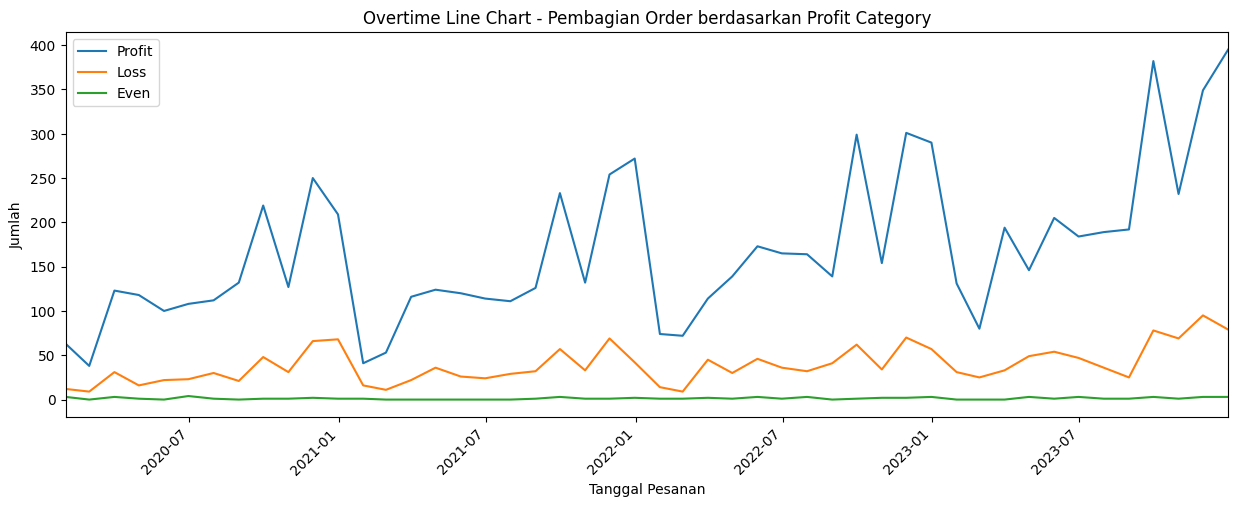

In [28]:
counts_over_time = df.copy()

counts_over_time['Date Key'] = pd.to_datetime(counts_over_time['Date Key'])  # Ensure 'Date Key' is in datetime format
counts_over_time = counts_over_time.groupby([pd.Grouper(key='Date Key', freq='M'), 'Profit Category']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 5))
sns.lineplot(data=counts_over_time, x='Date Key', y='Profit', label='Profit')
sns.lineplot(data=counts_over_time, x='Date Key', y='Loss', label='Loss')
sns.lineplot(data=counts_over_time, x='Date Key', y='Even', label='Even')

plt.xlim(counts_over_time.index.min(), counts_over_time.index.max())

plt.title("Overtime Line Chart - Pembagian Order berdasarkan Profit Category")
plt.xlabel("Tanggal Pesanan")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Jumlah")
plt.legend()

plt.show()

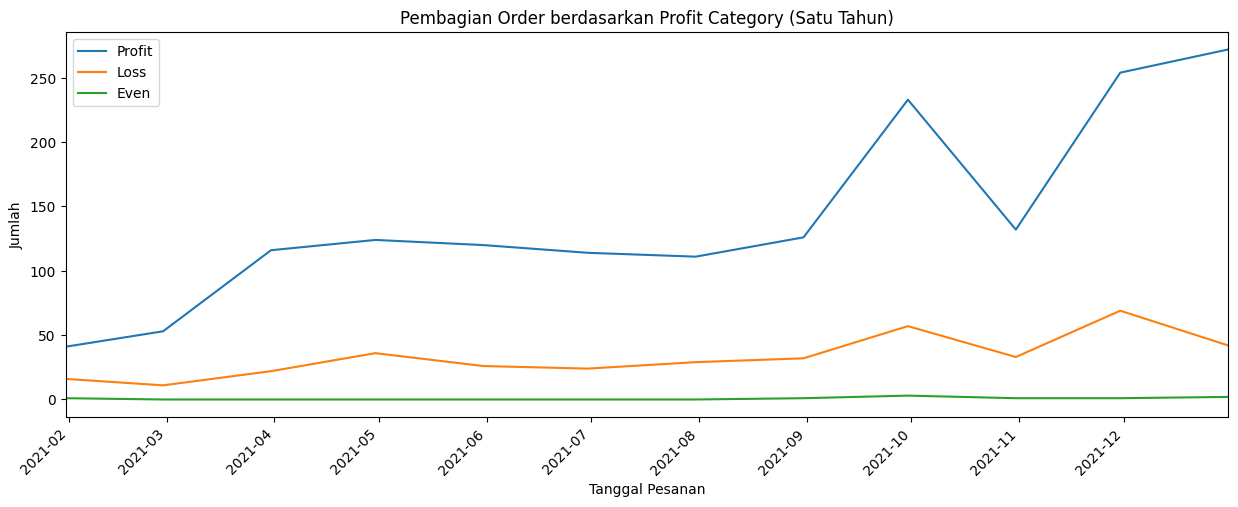

In [29]:
counts_over_time = df.copy()
counts_over_time['Date Key'] = pd.to_datetime(counts_over_time['Date Key'])
counts_over_time = counts_over_time[counts_over_time['Date Key'].dt.year == 2021]
counts_over_time = counts_over_time.groupby([pd.Grouper(key='Date Key', freq='M'), 'Profit Category']).size().unstack(fill_value=0)

min_date = counts_over_time.index.min()
max_date = counts_over_time.index.max()

plt.figure(figsize=(15, 5))
sns.lineplot(data=counts_over_time, x='Date Key', y='Profit', label='Profit')
sns.lineplot(data=counts_over_time, x='Date Key', y='Loss', label='Loss')
sns.lineplot(data=counts_over_time, x='Date Key', y='Even', label='Even')

plt.xlim(min_date, max_date)

plt.title("Pembagian Order berdasarkan Profit Category (Satu Tahun)")
plt.xlabel("Tanggal Pesanan")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Jumlah")
plt.legend()

plt.show()

Dari 2 grafik ini, kita dapat menjawab 2 pertanyan tersebut. 

* Apakah ada pola waktu penjualan?

Ada, dengan bulan Oktober, Desember dan Januari sebegai puncak pesanan sedangkan Februari dan Nopember sebagai penurunan tertinggi.
* Apakah ada perbedaan keuntungan dan kerugian transaksi pada waktu tertentu?

Tidak, kecuali untuk tahun 2023, jumlah pesanan yang rugi mengikuti jumlah pesanan beruntung.

## Analisa Mendalam

Sekarang, kita akan kembali ke negara Jepang, Australia dan Perancis untuk mencari apakah ada faktor spesifik yang menyebabkan tingginya jumlah transaksi rugi.

Kita dapat melakukan ini dengan menggunakkan informasi bahwa `Discount` adalah faktor utama yang menurunkan `Profit`, jadi kita akan menampilkan distribusi `Discount` dalam negara-negara tersebut.

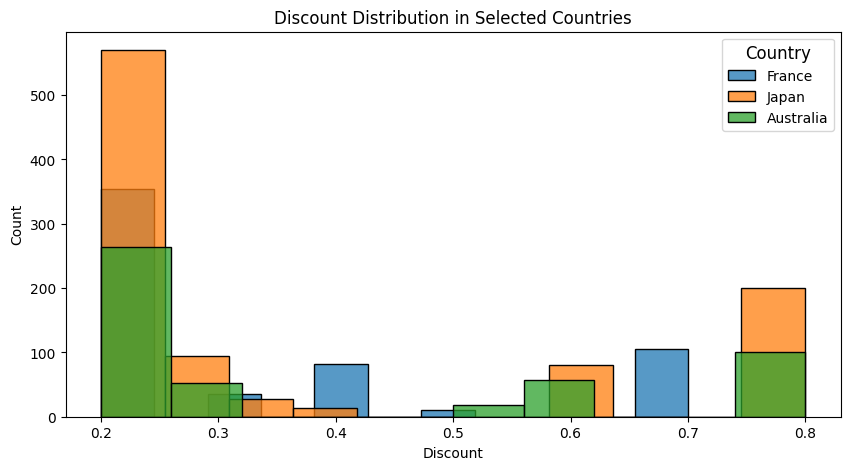

In [44]:
selected_countries = ['France', 'Japan', 'Australia']
filtered_df = df[df['Country'].isin(selected_countries)]

plt.figure(figsize=(10, 5))

# Create a histplot for each country with labels
for country in selected_countries:
    sns.histplot(data=filtered_df[filtered_df['Country'] == country], x='Discount', label=country)

plt.title("Discount Distribution in Selected Countries")
plt.xlabel("Discount")
plt.ylabel("Count")

# Create a legend
plt.legend(title='Country', title_fontsize='12')

plt.show()

Chart itu menunjukkan alasan mengapa Australia, Jepang dan Perancis merupakan negara yang memiliki banyak transaksi rugi.

Semua transaksi pada negara tersebut memiliki `Discount` pada atau diatas 0.2, yang merupakan titik dimana transaksi mulai lebih sering rugi.

# Kesimpulan dan Rekomendasi

Dari analisa di atas, ini adalah kesimpulan yang dapat ditarik :

* Dari 9994 transaksi, 65 titik imps, 8058 beruntung, dan 1871 rugi
* Mayoritas penjualan dari daerah EMEA dan AMER
* Versi "Gold" sebuah produk lebih beruntung daripada versi standar
* `Sales` dan `Quantity` adalah faktor yang mendorong profit ke atas, sedangkan `Discount` mendorong profit turun
* Ada kenaikan dalam jumlah pesan pada bulan Oktober, Desember dan Januari

Perbedaan antara transaksi untung dan transaksi rugi adalah diskon.

**Rekomendasi**

1. Jangan lakukan pesan dengan diskon di atas 0.2
2. Beri prioritas terhadap menjual versi Gold sebuah produk daripada versi standar
3. Dapat melakukan promosi pada bulan Oktober, Desember dan Januari untuk memanfaatkan kenaikan dalam penjualan
4. Produk Support dan ChatBot Plugin adalah produk yang teraman untuk profitabilitas, dengan jumlah transaksi rugi yang rendah terbanding jumlah transaksi untung
    * Produk Alchemy juga beruntung, tetapi kurang cukup data untuk mengatakan dengan yakin bahwa baik untuk diprioritaskan